# <div align = center>CIFAR 10:  مجموعة الصور الملونة المصنفة إلى 10 فئات.

#1 - المكتبات (Librairies)

In [ ]:
from keras.datasets import cifar10 as DS
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.python.keras import regularizers

from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt

# 2 - البيانات  (Data)

## 2.1 - تحميل البيانات

In [ ]:
(x_train, y_train),(x_test, y_test) = DS.load_data()

In [ ]:
print("x_train shape =" , x_train.shape)
print("y_train shape =" , y_train.shape)

print("\nx_test shape =" , x_test.shape)
print("x_test shape =" , x_test.shape)

x_train shape = (50000, 32, 32, 3)
y_train shape = (50000, 1)

x_test shape = (10000, 32, 32, 3)
x_test shape = (10000, 32, 32, 3)


## 2.2 - عرض عينة من البيانات

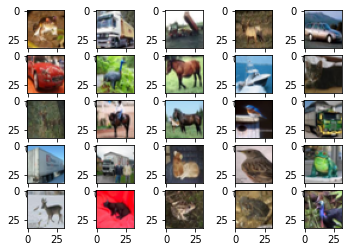

In [ ]:
figure = plt.figure()

for i in range(25):
  figure.add_subplot(5, 5, i+1)
  plt.imshow(x_train[i])

plt.show()

## 2.3 -  "One hot encoding" تغيير ترميز المخرجات إلى الترميز  

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 2.4 -  تطبيع المدخلات

In [ ]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

# 3- الشبكة العصبية

## 3.1 -  النموذج 

In [ ]:
lamda = 0.2

In [ ]:
model = Sequential([
              Conv2D( 32, kernel_size=(3, 3), 
                     padding='valid', 
                     activation='relu', 
                     input_shape=(32,32,3), 
                     kernel_regularizer=regularizers.l2(lamda)),
                    
              MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
              BatchNormalization(),

              Conv2D( 64, (3, 3), 
                     padding='valid', 
                     activation='relu', 
                     kernel_regularizer=regularizers.l2(lamda)),
                    
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),
              BatchNormalization(),

              Conv2D(128, (3, 3), 
                     padding='valid', 
                     activation='relu', 
                     kernel_regularizer=regularizers.l2(lamda)),
                    
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),
              BatchNormalization(),

              Conv2D(256, (3, 3), 
                     padding='valid', 
                     activation='relu', 
                     kernel_regularizer=regularizers.l2(lamda)),
                    
              MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'),
              BatchNormalization(),

              Flatten(),     
                        
              Dense(1025, activation='relu'),              
              Dense(512, activation='relu'),              
              Dense(256, activation='relu'),              
              Dense(128, activation='relu'),               
              Dense(10, activation='softmax')

])



## 3.2 -  تركيب النموذج 

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = categorical_crossentropy,
    metrics=['accuracy']
)

## 3.3 - تدريب النموذج



In [ ]:
nb_epochs = 15

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=nb_epochs, verbose=1, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 9s 18ms/step - loss: 5.6758 - accuracy: 0.4174 - val_loss: 3.4231 - val_accuracy: 0.1016
Epoch 2/15
313/313 [==============================] - 5s 17ms/step - loss: 1.8863 - accuracy: 0.5031 - val_loss: 2.0197 - val_accuracy: 0.4509
Epoch 3/15
313/313 [==============================] - 5s 17ms/step - loss: 1.8061 - accuracy: 0.5237 - val_loss: 1.9058 - val_accuracy: 0.4693
Epoch 4/15
313/313 [==============================] - 5s 16ms/step - loss: 1.7425 - accuracy: 0.5395 - val_loss: 1.8254 - val_accuracy: 0.5261
Epoch 5/15
313/313 [==============================] - 5s 17ms/step - loss: 1.6987 - accuracy: 0.5529 - val_loss: 1.7916 - val_accuracy: 0.5170
Epoch 6/15
313/313 [==============================] - 5s 16ms/step - loss: 1.6545 - accuracy: 0.5647 - val_loss: 1.9047 - val_accuracy: 0.4903
Epoch 7/15
313/313 [==============================] - 5s 16ms/step - loss: 1.6187 - accuracy: 0.5731 - val_loss: 1.6970 - val_accuracy: 0.5462

## 3.4 -  التقييم


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy = %0.2f" % (acc*100), "%")

313/313 [==============================] - 2s 7ms/step - loss: 1.4354 - accuracy: 0.6052
Accuracy = 60.52 %


## 3.5 -  الرسوم البيانية للتعلم


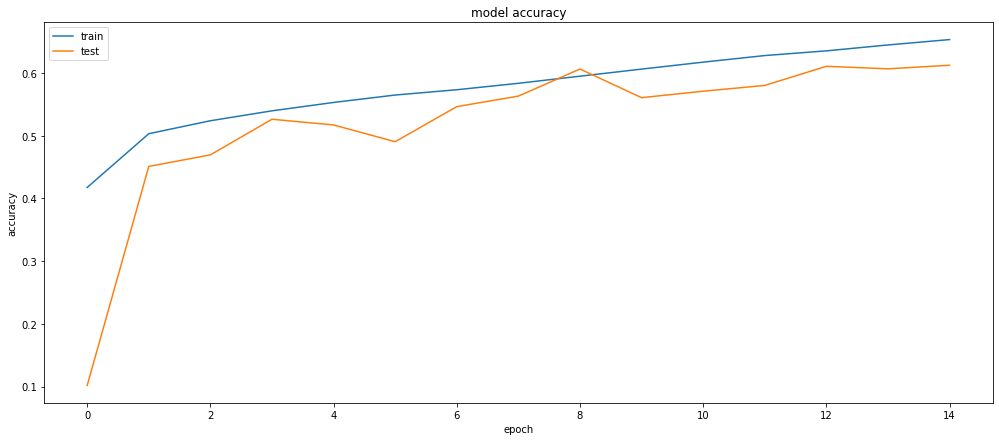

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()

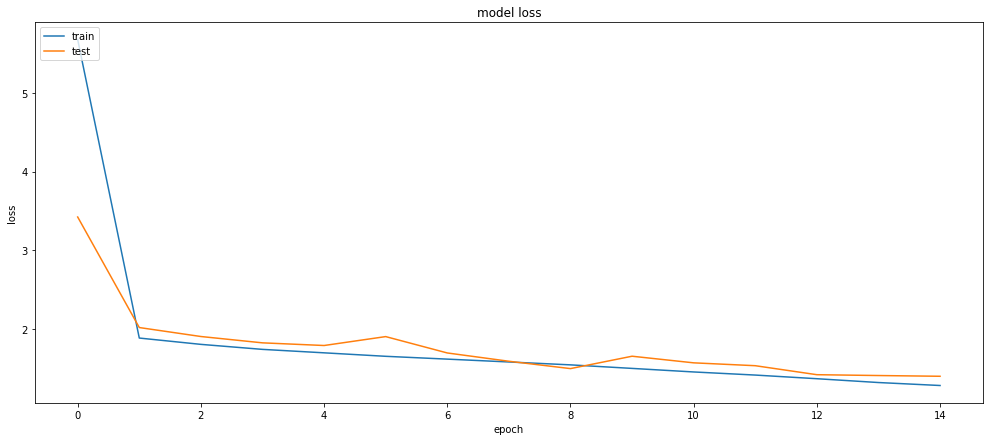

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.rcParams["figure.figsize"] = (17,7)
plt.show()